# VIF: Variance Inflation factor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df=pd.read_csv('Data/Credit.csv').drop(['Unnamed: 0'],axis=1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])
dummies.head()

,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,0,1,0
3,0,1,1,0,1,0,0,1,0
4,1,0,1,0,0,1,0,0,1


In [5]:
X_=df.drop(['Gender', 'Student', 'Married','Ethnicity','Balance'], axis=1)
X = pd.concat([X_, dummies[['Gender_Female', 'Student_Yes', 'Married_Yes','Ethnicity_African American','Ethnicity_Asian']]], axis=1)
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
0,14.891,3606,283,2,34,11,0,0,1,0,0
1,106.025,6645,483,3,82,15,1,1,1,0,1
2,104.593,7075,514,4,71,11,0,0,0,0,1
3,148.924,9504,681,3,36,11,1,0,0,0,1
4,55.882,4897,357,2,68,16,0,0,1,0,0


<Figure size 432x288 with 0 Axes>

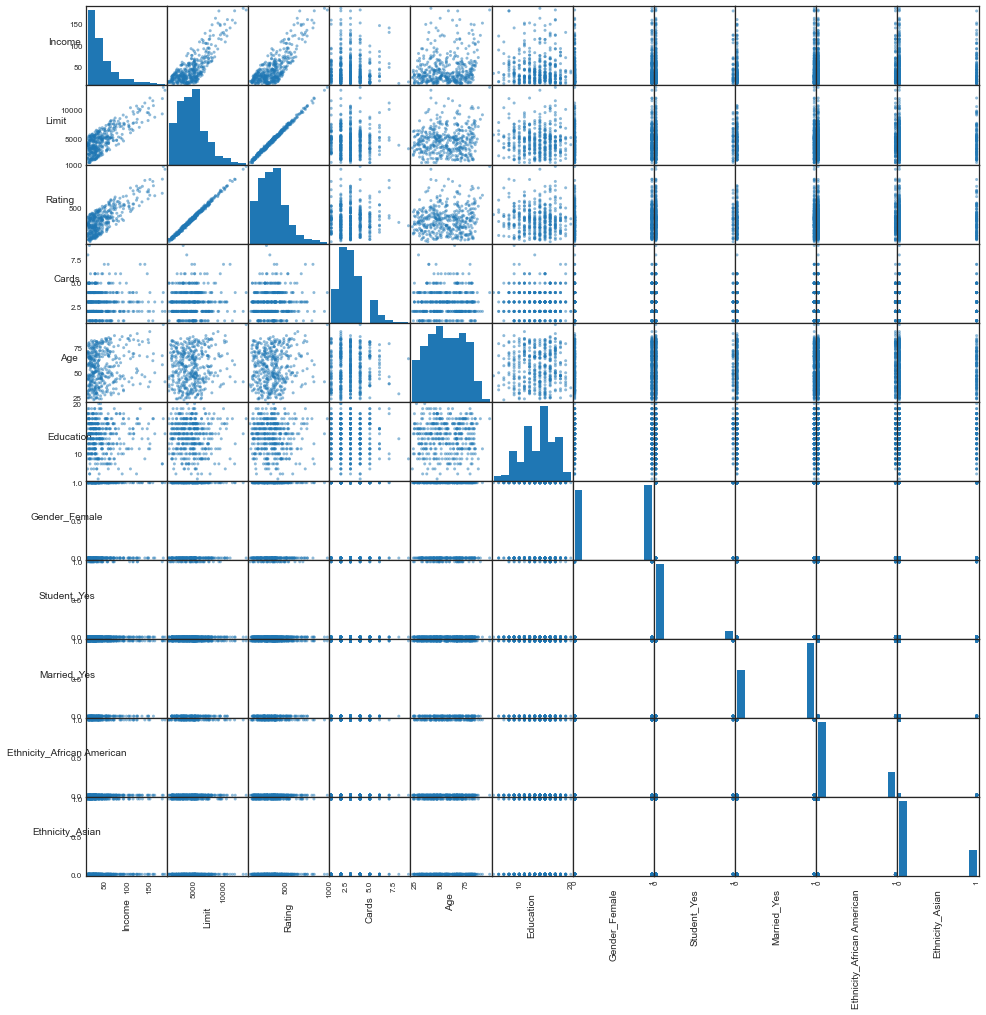

In [6]:
plt.figure()
axes=pd.plotting.scatter_matrix(X,figsize=(16,16))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
plt.show()

In [7]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [8]:
vif_data.head(11)

,feature,VIF
0,Income,7.210894
1,Limit,1076.918485
2,Rating,1273.228966
3,Cards,8.178001
4,Age,9.710669
5,Education,11.787414
6,Gender_Female,2.042636
7,Student_Yes,1.146115
8,Married_Yes,2.646457
9,Ethnicity_African American,1.500733


<Figure size 432x288 with 0 Axes>

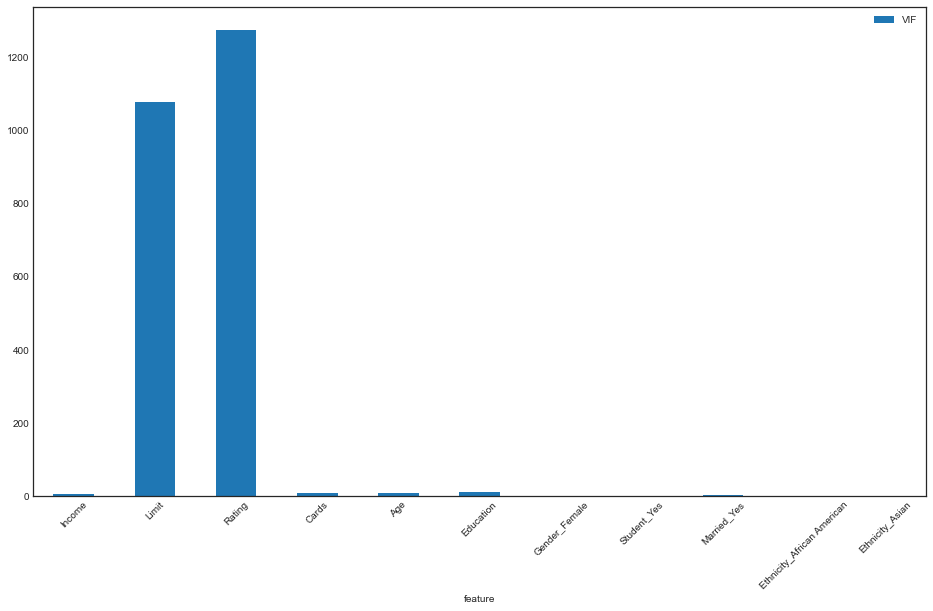

In [9]:
plt.figure()
ax = vif_data.plot.bar(x='feature', y='VIF', rot=45,figsize=(16,9))
plt.show()